
## <i>Assumptions: </i>
### <i>1) t varies from 0 to 1 only</i>
### <i>2) The length of the curve is a constant</i>

## Importing modules

In [31]:
import string
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Assuming the parameter t varies from 0 to 1 only

In [32]:
t = np.linspace(0, 1, 1000)

## Taking curve as input

In [34]:
# Specify the number of axes that the curve has
xy = int(input('Enter the number of axes: '))

arr = []
for i in range(xy):
    x = input('Enter the function as f for f(t), eg. np.sin(t) : ')
    arr.append(x)
    
Point = np.array([eval(i) for i in arr])
# P_t = np.array([np.cos(t), np.sin(t)])

print('\nShape of the curve formed:', Point.shape)

Enter the number of axes: 2
Enter the function as f for f(t), eg. np.sin(t) : np.sin(t)
Enter the function as f for f(t), eg. np.sin(t) : np.cos(t)

Shape of the curve formed: (2, 1000)


## Find the length of the curve using the equation
$\renewcommand{\vec}[1]{\mathbf{#1}}$
\begin{align}
L &= \int ||p'(\vec{t})|| dt \\
L &= \sum\limits_{t=0}^1 ||p(\vec{t + \delta t}) - p(\vec{t})||
\end{align}



In [35]:
def find_length(Point):
    length = 0
    for i in range(Point.shape[1]-1):
        unit_len = 0
        for j in range(Point.shape[0]):
            unit_len += np.power(Point[j, i+1] - Point[j, i], 2)

        length += np.sqrt(unit_len)

    length_of_Point = np.round(length, 3)
    return length_of_Point

length_of_Point = find_length(Point)
print("Total Length of the curve:", length_of_Point)

Total Length of the curve: 1.0


## Write arc-length parameter s in terms of t

In [36]:
s = length_of_Point * t

## Let the new curve be C(s) where C(s) = P(t)

In [37]:
# Replacing t with s/length_of_Pt

new_arr = []
for i in arr:
    eq = list(i)
    len_eqn = len(eq)
    
    j = 0
    while j < len_eqn:
        if eq[j] == '(':
            k = j + 1
            while eq[k] != ')':
                if eq[k] == 't':
                    if eq[k+1] not in string.ascii_lowercase + string.ascii_uppercase:
                        eq[k] = 's/length_of_Point'
                k += 1
            j = k
        j += 1
    new_arr.append(eval(''.join(eq)))

new_arr = np.array(new_arr)

## Plot the curves formed

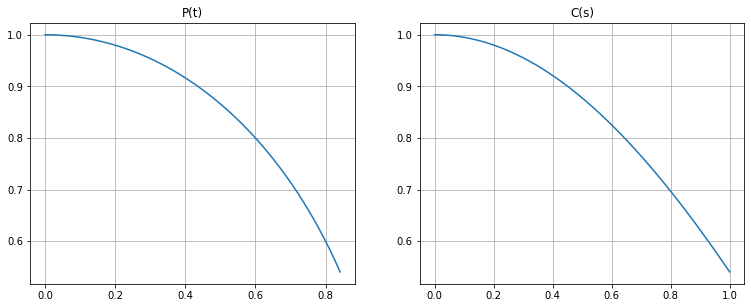

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(6.4*2, 4.8))
ax[0].grid()
ax[0].plot(Point[0], Point[1])
ax[0].set_title('P(t)')

ax[1].grid()
ax[1].plot(s, new_arr[1])
ax[1].set_title('C(s)')

plt.show()

## Printing the gradient at each point for sanity check

In [40]:
for i in range(new_arr.shape[1]-1):
    unit_len = 0
    for j in range(new_arr.shape[0]):
        gradient = (new_arr[j, i+1] - new_arr[j, i])/(s[i+1] - s[i])
        unit_len += np.power(gradient, 2)

    print(f'Gradient at point no. {i+1}: {np.sqrt(unit_len)}')


Gradient at point no. 1: 0.9999999582498754
Gradient at point no. 2: 0.9999999582498754
Gradient at point no. 3: 0.9999999582498752
Gradient at point no. 4: 0.9999999582498753
Gradient at point no. 5: 0.9999999582498755
Gradient at point no. 6: 0.9999999582498754
Gradient at point no. 7: 0.9999999582498749
Gradient at point no. 8: 0.9999999582498753
Gradient at point no. 9: 0.9999999582498768
Gradient at point no. 10: 0.9999999582498735
Gradient at point no. 11: 0.9999999582498763
Gradient at point no. 12: 0.9999999582498749
Gradient at point no. 13: 0.9999999582498759
Gradient at point no. 14: 0.9999999582498746
Gradient at point no. 15: 0.9999999582498774
Gradient at point no. 16: 0.9999999582498746
Gradient at point no. 17: 0.9999999582498742
Gradient at point no. 18: 0.9999999582498754
Gradient at point no. 19: 0.9999999582498765
Gradient at point no. 20: 0.9999999582498738
Gradient at point no. 21: 0.999999958249875
Gradient at point no. 22: 0.9999999582498796
Gradient at point no

## As gradient at each defined point of the curve is ~1, we can say that the curve is successfully arc length parameterised.